In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns

In [2]:
df=load_boston()


In [3]:
dataset=pd.DataFrame(df.data)

In [4]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dataset.columns=df.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.target.shape

(506,)

In [7]:
dataset['price']=df.target

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
       #Linear_Regression
    
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error',cv=5)

In [13]:
mean_mse=np.mean(mse)
print(mean_mse)

-37.131807467699375


In [14]:
         #ridge_Regression

from sklearn.linear_model import Ridge  
from sklearn.model_selection import GridSearchCV

In [15]:
rid=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [16]:
rid_reg=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error',cv=5)

In [17]:
rid_reg.fit(x,y)
print(rid_reg.best_params_)
print(rid_reg.best_score_)

{'alpha': 100}
-29.905701947540376


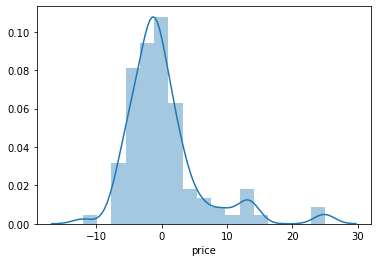

In [18]:
prediction_rid=rid_reg.predict(x_test)
sns.distplot(y_test-prediction_rid)

In [19]:
     #lasso_Regression

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [20]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

In [21]:
lasso_reg.fit(x,y)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

C:\Users\veerpal kashyap\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3925.096258531118, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\veerpal kashyap\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4364.146116712705, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\veerpal kashyap\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4219.611889957091, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\veerpal kashyap\anaconda3\lib\site-packages\sklearn\linear_model\_co

{'alpha': 1}
-35.531580220694856


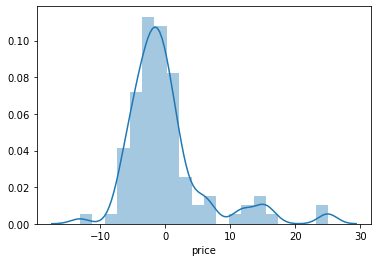

In [22]:
prediction_lasso=lasso_reg.predict(x_test)
sns.distplot(y_test-prediction_lasso)